In [26]:
# Python imports
import numpy as np # Matrix and vector computation package
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm  # Colormaps
from matplotlib.colors import LogNorm  # Log colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable


In [61]:
# # Create dataset
# nb_of_samples = 20
# sequence_len = 10
# # Create the sequences
# X = np.zeros((nb_of_samples, sequence_len))
# for row_idx in range(nb_of_samples):
#     X[row_idx,:] = np.random.rand(sequence_len)
# # Create the targets for each sequence
# t = np.sum(X, axis=1)
# print(X)

nb_of_samples = 100
sequence_len = 5
tmp = pd.read_csv('BTCtrain.csv')
tmp2 = tmp.head(100)
X = tmp2.drop(columns=['Date','Adj Close']).as_matrix()
t = tmp2['Adj Close'].as_matrix()
display(X)
display(t)

array([[4.9510e-02, 4.9510e-02, 4.9510e-02, 4.9510e-02, 0.0000e+00],
       [4.9510e-02, 8.5850e-02, 5.9410e-02, 8.5840e-02, 5.0000e+00],
       [8.5840e-02, 9.3070e-02, 7.7230e-02, 8.0800e-02, 4.9000e+01],
       [8.0800e-02, 8.1810e-02, 7.4260e-02, 7.4740e-02, 2.0000e+01],
       [7.4740e-02, 7.9210e-02, 6.6340e-02, 7.9210e-02, 4.2000e+01],
       [7.9210e-02, 8.1810e-02, 5.0500e-02, 5.0500e-02, 1.2900e+02],
       [5.0500e-02, 6.7670e-02, 5.0500e-02, 6.2620e-02, 1.4100e+02],
       [6.2620e-02, 6.1610e-02, 5.0490e-02, 5.4540e-02, 2.6000e+01],
       [5.4540e-02, 5.9410e-02, 5.0500e-02, 5.0500e-02, 8.5000e+01],
       [5.0500e-02, 5.6000e-02, 5.0000e-02, 5.6000e-02, 4.6000e+01],
       [5.6000e-02, 6.0500e-02, 5.3000e-02, 6.0000e-02, 1.9600e+02],
       [6.0000e-02, 6.2000e-02, 5.4000e-02, 5.8900e-02, 2.5500e+02],
       [5.8900e-02, 6.9900e-02, 5.7100e-02, 6.9900e-02, 5.2800e+02],
       [6.9900e-02, 6.9800e-02, 5.8200e-02, 6.2700e-02, 1.9800e+02],
       [6.2700e-02, 6.8890e-02, 5.

array([0.04951, 0.08584, 0.0808 , 0.07474, 0.07921, 0.0505 , 0.06262,
       0.05454, 0.0505 , 0.056  , 0.06   , 0.0589 , 0.0699 , 0.0627 ,
       0.06785, 0.0611 , 0.06   , 0.06   , 0.057  , 0.061  , 0.0623 ,
       0.059  , 0.0609 , 0.071  , 0.07   , 0.067  , 0.07   , 0.0645 ,
       0.067  , 0.06529, 0.0655 , 0.07   , 0.068  , 0.0667 , 0.0655 ,
       0.0664 , 0.066  , 0.06491, 0.065  , 0.0648 , 0.064  , 0.065  ,
       0.0641 , 0.064  , 0.06497, 0.06   , 0.0629 , 0.0634 , 0.06085,
       0.06238, 0.0616 , 0.0616 , 0.061  , 0.062  , 0.06111, 0.0618 ,
       0.06366, 0.0615 , 0.06219, 0.06199, 0.0604 , 0.0619 , 0.059  ,
       0.061  , 0.0627 , 0.0621 , 0.06265, 0.0622 , 0.06231, 0.0622 ,
       0.06202, 0.062  , 0.0622 , 0.0619 , 0.06191, 0.0619 , 0.06197,
       0.0614 , 0.06111, 0.0613 , 0.0614 , 0.06281, 0.067  , 0.08685,
       0.0938 , 0.0965 , 0.095  , 0.0949 , 0.105  , 0.102  , 0.105  ,
       0.101  , 0.102  , 0.1024 , 0.097  , 0.099  , 0.107  , 0.1025 ,
       0.1055 , 0.11

In [79]:
# Define the forward step functions
def update_state(xk, sk, wx, wRec):
    """
    Compute state k from the previous state (sk) and current input (xk),
    by use of the input weights (wx) and recursive weights (wRec).
    """
    return xk * wx + sk * wRec

def forward_states(X, wx, wRec):
    """
    Unfold the network and compute all state activations given the input X,
    and input weights (wx) and recursive weights (wRec).
    Return the state activations in a matrix, the last column S[:,-1] contains the
    final activations.
    """
    # Initialise the matrix that holds all states for all input sequences.
    # The initial state s0 is set to 0.
    S = np.zeros((X.shape[0], X.shape[1]+1))
    # Use the recurrence relation defined by update_state to update the 
    #  states trough time.
    for k in range(0, X.shape[1]):
        # S[k] = S[k-1] * wRec + X[k] * wx
        S[:,k+1] = update_state(X[:,k], S[:,k], wx, wRec)
    return S

def cost(y, t): 
    """
    Return the MSE between the targets t and the outputs y.
    """
    return ((t - y)**2).sum() / nb_of_samples

In [17]:
def output_gradient(y, t):
    """
    Compute the gradient of the MSE cost function with respect to the output y.
    """
    return 2.0 * (y - t) / nb_of_samples

def backward_gradient(X, S, grad_out, wRec):
    """
    Backpropagate the gradient computed at the output (grad_out) through the network.
    Accumulate the parameter gradients for wX and wRec by for each layer by addition.
    Return the parameter gradients as a tuple, and the gradients at the output of each layer.
    """
    # Initialise the array that stores the gradients of the cost with respect to the states.
    grad_over_time = np.zeros((X.shape[0], X.shape[1]+1))
    grad_over_time[:,-1] = grad_out
    # Set the gradient accumulations to 0
    wx_grad = 0
    wRec_grad = 0
    for k in range(X.shape[1], 0, -1):
        # Compute the parameter gradients and accumulate the results.
        wx_grad += np.sum(grad_over_time[:,k] * X[:,k-1])
        wRec_grad += np.sum(grad_over_time[:,k] * S[:,k-1])
        # Compute the gradient at the output of the previous layer
        grad_over_time[:,k-1] = grad_over_time[:,k] * wRec
    return (wx_grad, wRec_grad), grad_over_time

In [62]:
# Perform gradient checking
# Set the weight parameters used during gradient checking
params = [1.2, 1.2]  # [wx, wRec]
# Set the small change to compute the numerical gradient
eps = 1e-7
# Compute the backprop gradients
S = forward_states(X, params[0], params[1])
grad_out = output_gradient(S[:,-1], t)
backprop_grads, grad_over_time = backward_gradient(X, S, grad_out, params[1])
# Compute the numerical gradient for each parameter in the layer
for p_idx, _ in enumerate(params):
    grad_backprop = backprop_grads[p_idx]
    # + eps
    params[p_idx] += eps
    plus_cost = cost(forward_states(X, params[0], params[1])[:,-1], t)
    # - eps
    params[p_idx] -= 2 * eps
    min_cost = cost(forward_states(X, params[0], params[1])[:,-1], t)
    # reset param value
    params[p_idx] += eps
    # calculate numerical gradient
    grad_num = (plus_cost - min_cost) / (2*eps)
    # Raise error if the numerical grade is not close to the backprop gradient
    if not np.isclose(grad_num, grad_backprop):
        raise ValueError('Numerical gradient of {:.6f} is not close to the backpropagation gradient of {:.6f}!'.format(float(grad_num), float(grad_backprop)))
print('No gradient errors found')

No gradient errors found


In [63]:
# Define plotting functions

# Define points to annotate (wx, wRec, color)
points = [(2,1,'r'), (1,2,'b'), (1,-2,'g'), (1,0,'c'), (1,0.5,'m'), (1,-0.5,'y')]

def get_cost_surface(w1_low, w1_high, w2_low, w2_high, nb_of_ws, cost_func):
    """Define a vector of weights for which we want to plot the cost."""
    w1 = np.linspace(w1_low, w1_high, num=nb_of_ws)  # Weight 1
    w2 = np.linspace(w2_low, w2_high, num=nb_of_ws)  # Weight 2
    ws1, ws2 = np.meshgrid(w1, w2)  # Generate grid
    cost_ws = np.zeros((nb_of_ws, nb_of_ws))  # Initialize cost matrix
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_ws):
        for j in range(nb_of_ws):
            cost_ws[i,j] = cost_func(ws1[i,j], ws2[i,j])
    return ws1, ws2, cost_ws

def plot_surface(ax, ws1, ws2, cost_ws):
    """Plot the cost in function of the weights."""
    surf = ax.contourf(ws1, ws2, cost_ws, levels=np.logspace(-0.2, 8, 30), cmap=cm.pink, norm=LogNorm())
    ax.set_xlabel('$w_{in}$', fontsize=15)
    ax.set_ylabel('$w_{rec}$', fontsize=15)
    return surf

def plot_points(ax, points):
    """Plot the annotation points on the given axis."""
    for wx, wRec, c in points:
        ax.plot(wx, wRec, c+'o', linewidth=2)

def get_cost_surface_figure(cost_func, points):
    """Plot the cost surfaces together with the annotated points."""
    # Plot figures
    fig = plt.figure(figsize=(10, 4))   
    # Plot overview of cost function
    ax_1 = fig.add_subplot(1,2,1)
    ws1_1, ws2_1, cost_ws_1 = get_cost_surface(-3, 3, -3, 3, 100, cost_func)
    surf_1 = plot_surface(ax_1, ws1_1, ws2_1, cost_ws_1 + 1)
    plot_points(ax_1, points)
    ax_1.set_xlim(-3, 3)
    ax_1.set_ylim(-3, 3)
    # Plot zoom of cost function
    ax_2 = fig.add_subplot(1,2,2)
    ws1_2, ws2_2, cost_ws_2 = get_cost_surface(0, 2, 0, 2, 100, cost_func)
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, cost_ws_2 + 1)
    plot_points(ax_2, points)
    ax_2.set_xlim(0, 2)
    ax_2.set_ylim(0, 2)
    # Show the colorbar
    fig.subplots_adjust(right=0.8)
    cax = fig.add_axes([0.85, 0.12, 0.03, 0.78])
    cbar = fig.colorbar(surf_1, ticks=np.logspace(0, 8, 9), cax=cax)
    cbar.ax.set_ylabel('$\\xi$', fontsize=15, rotation=0, labelpad=20)
    cbar.set_ticklabels(['{:.0e}'.format(i) for i in np.logspace(0, 8, 9)])
    fig.suptitle('Cost surface', fontsize=15)
    return fig

def plot_gradient_over_time(points, get_grad_over_time):
    """Plot the gradients of the annotated point and how the evolve over time."""
    fig = plt.figure(figsize=(6.5, 4))  
    ax = plt.subplot(111)
    # Plot points
    for wx, wRec, c in points:
        grad_over_time = get_grad_over_time(wx, wRec)
        x = np.arange(-grad_over_time.shape[1]+1, 1, 1)
        plt.plot(x, np.sum(grad_over_time, axis=0), c+'-', label='({0}, {1})'.format(wx, wRec), linewidth=1, markersize=8)
    plt.xlim(0, -grad_over_time.shape[1]+1)
    # Set up plot axis
    plt.xticks(x)
    plt.yscale('symlog')
    plt.yticks([10**8, 10**6, 10**4, 10**2, 0, -10**2, -10**4, -10**6, -10**8])
    plt.xlabel('timestep k', fontsize=12)
    plt.ylabel('$\\frac{\\partial \\xi}{\\partial S_{k}}$', fontsize=20, rotation=0)
    plt.grid()
    plt.title('Unstability of gradient in backward propagation.\n(backpropagate from left to right)')
    # Set legend
    leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, numpoints=1)
    leg.set_title('$(w_x, w_{rec})$', prop={'size':15})
    
def get_grad_over_time(wx, wRec):
    """Helper func to only get the gradient over time from wx and wRec."""
    S = forward_states(X, wx, wRec)
    grad_out = output_gradient(S[:,-1], t).sum()
    _, grad_over_time = backward_gradient(X, S, grad_out, wRec)
    return grad_over_time

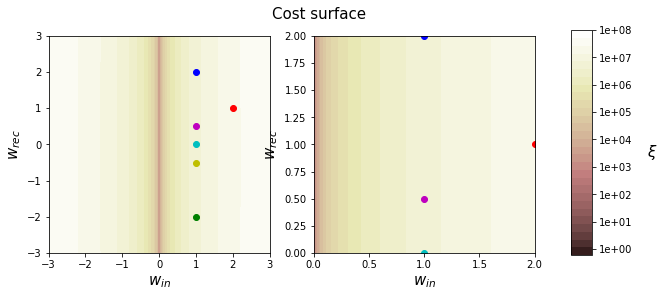

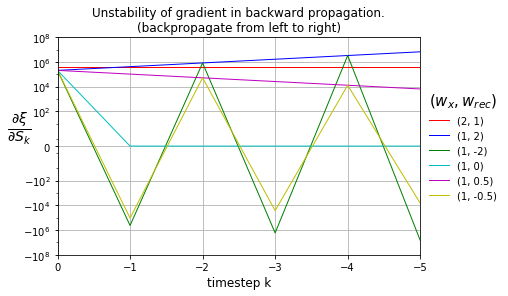

In [64]:
# Plot cost surface and gradients

# Get and plot the cost surface figure with markers
fig = get_cost_surface_figure(lambda w1, w2: cost(forward_states(X, w1, w2)[:,-1] , t), points)

# Get the plots of the gradients changing by backpropagating.
plot_gradient_over_time(points, get_grad_over_time)
# Show figures
plt.show()

In [45]:
# Define Rprop optimisation function
def update_rprop(X, t, W, W_prev_sign, W_delta, eta_p, eta_n):
    """
    Update Rprop values in one iteration.
    X: input data.
    t: targets.
    W: Current weight parameters.
    W_prev_sign: Previous sign of the W gradient.
    W_delta: Rprop update values (Delta).
    eta_p, eta_n: Rprop hyperparameters.
    """
    # Perform forward and backward pass to get the gradients
    S = forward_states(X, W[0], W[1])
    grad_out = output_gradient(S[:,-1], t)
    W_grads, _ = backward_gradient(X, S, grad_out, W[1])
    W_sign = np.sign(W_grads)  # Sign of new gradient
    # Update the Delta (update value) for each weight parameter seperately
    for i, _ in enumerate(W):
        if W_sign[i] == W_prev_sign[i]:
            W_delta[i] *= eta_p
        else:
            W_delta[i] *= eta_n
    return W_delta, W_sign

In [65]:
# Perform Rprop optimisation

# Set hyperparameters
eta_p = 1.2
eta_n = 0.5

# Set initial parameters
W = [-1.5, 2]  # [wx, wRec]
W_delta = [0.001, 0.001]  # Update values (Delta) for W
W_sign = [0, 0]  # Previous sign of W

ls_of_ws = [(W[0], W[1])]  # List of weights to plot
# Iterate over 500 iterations
for i in range(500):
    # Get the update values and sign of the last gradient
    W_delta, W_sign = update_rprop(X, t, W, W_sign, W_delta, eta_p, eta_n)
    # Update each weight parameter seperately
    for i, _ in enumerate(W):
        W[i] -= W_sign[i] * W_delta[i]
    ls_of_ws.append((W[0], W[1]))  # Add weights to list to plot

print('Final weights are: wx = {0},  wRec = {1}'.format(W[0], W[1]))

Final weights are: wx = 2.9876587245895705e-06,  wRec = -24.048766675217745


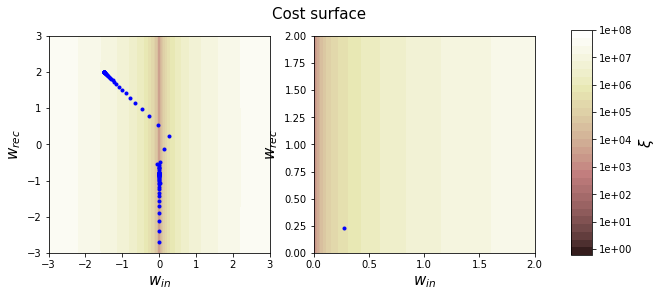

In [66]:
# Plot the cost surface with the weights over the iterations.

# Define plot function
def plot_optimisation(ls_of_ws, cost_func):
    """Plot the optimisation iterations on the cost surface."""
    ws1, ws2 = zip(*ls_of_ws)
    # Plot figures
    fig = plt.figure(figsize=(10, 4))
    # Plot overview of cost function
    ax_1 = fig.add_subplot(1,2,1)
    ws1_1, ws2_1, cost_ws_1 = get_cost_surface(-3, 3, -3, 3, 100, cost_func)
    surf_1 = plot_surface(ax_1, ws1_1, ws2_1, cost_ws_1 + 1)
    ax_1.plot(ws1, ws2, 'b.')
    ax_1.set_xlim([-3,3])
    ax_1.set_ylim([-3,3])
    # Plot zoom of cost function
    ax_2 = fig.add_subplot(1,2,2)
    ws1_2, ws2_2, cost_ws_2 = get_cost_surface(0, 2, 0, 2, 100, cost_func)
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, cost_ws_2 + 1)
    ax_2.set_xlim([0,2])
    ax_2.set_ylim([0,2])
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, cost_ws_2)
    ax_2.plot(ws1, ws2, 'b.')
    # Show the colorbar
    fig.subplots_adjust(right=0.8)
    cax = fig.add_axes([0.85, 0.12, 0.03, 0.78])
    cbar = fig.colorbar(surf_1, ticks=np.logspace(0, 8, 9), cax=cax)
    cbar.ax.set_ylabel('$\\xi$', fontsize=15)
    cbar.set_ticklabels(['{:.0e}'.format(i) for i in np.logspace(0, 8, 9)])
    plt.suptitle('Cost surface', fontsize=15)
    plt.show()
    
# Plot the optimisation
plot_optimisation(ls_of_ws, lambda w1, w2: cost(forward_states(X, w1, w2)[:,-1] , t))
plt.show()

In [87]:
test_inpt = tmp.drop(columns=['Date','Adj Close']).iloc[101:131].as_matrix()
test_outpt = forward_states(test_inpt, W[0], W[1])[:,-1]
targ = tmp.iloc[101:130]['Adj Close'].as_matrix()
for i in range(len(targ)):
    print('Target output: {:.2f} vs Model output: {:.2f}'.format(targ[i], test_outpt[i]))

Target output: 0.15 vs Model output: 0.13
Target output: 0.19 vs Model output: 0.18
Target output: 0.17 vs Model output: 0.19
Target output: 0.19 vs Model output: 0.18
Target output: 0.20 vs Model output: 0.20
Target output: 0.19 vs Model output: 0.21
Target output: 0.20 vs Model output: 0.20
Target output: 0.19 vs Model output: 0.19
Target output: 0.19 vs Model output: 0.22
Target output: 0.23 vs Model output: 0.20
Target output: 0.26 vs Model output: 0.25
Target output: 0.39 vs Model output: 0.27
Target output: 0.34 vs Model output: 0.45
Target output: 0.24 vs Model output: 0.44
Target output: 0.21 vs Model output: 0.27
Target output: 0.24 vs Model output: 0.22
Target output: 0.22 vs Model output: 0.23
Target output: 0.27 vs Model output: 0.24
Target output: 0.28 vs Model output: 0.27
Target output: 0.28 vs Model output: 0.28
Target output: 0.27 vs Model output: 0.27
Target output: 0.22 vs Model output: 0.28
Target output: 0.23 vs Model output: 0.24
Target output: 0.27 vs Model outpu